In [5]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import joblib
import os


In [6]:
# Dynamically determine the root directory (assumes the notebook is in the "Notebooks" directory)
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Path to the dataset relative to the root directory
dataset_path = os.path.join(ROOT_DIR, 'Notebooks', 'preprocessed_data.csv')

# Load the preprocessed dataset
df = pd.read_csv(dataset_path)

# Display the dataset
print(df.head())

   Genre       Age  Annual Income (k$)  Spending Score (1-100)
0      0 -0.850000           -1.319149               -0.293200
1      0 -0.750000           -1.319149                0.834316
2      1 -0.800000           -0.015904               -1.179107
3      1  0.146482           -1.290780               -0.002102
4      1 -0.250000           -1.262411               -0.266355


In [7]:
X = df.iloc[:, :]  # Use all columns for clustering (excluding the target column)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

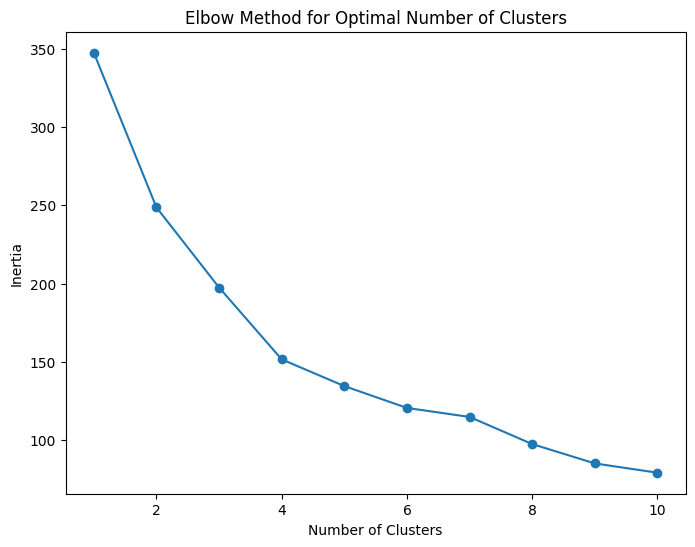

In [8]:
# Assuming the dataset has a target column that we want to exclude for clustering
X = df.select_dtypes(include=[np.number])  # Select only numerical columns (for clustering)

# Elbow Method to find the optimal number of clusters
inertia = []  # List to store inertia values for each number of clusters
max_clusters = 10  # You can adjust this range based on your dataset

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Inertia is the sum of squared distances from centroids

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Silhouette Score: 0.28524955288531556


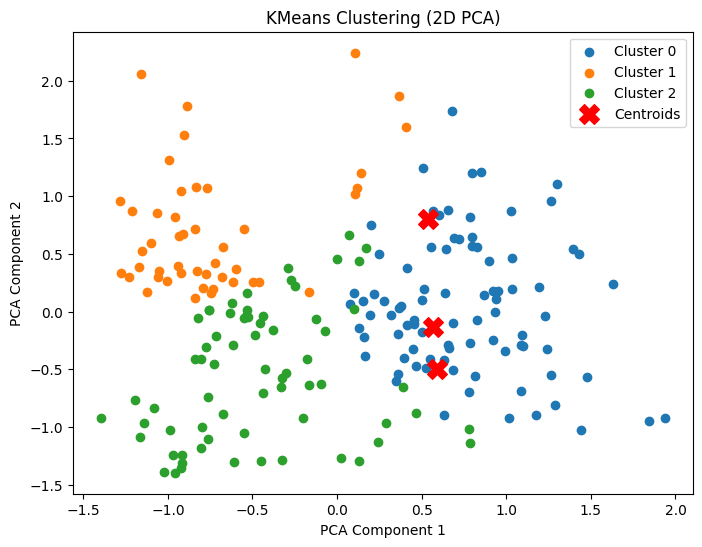

KMeans model saved at ..\savedModels\kmeans_model.joblib


'..\\savedModels\\kmeans_model.joblib'

In [9]:
# From the graph, choose the optimal number of clusters (where the 'elbow' is)
optimal_k = 3  # For example, if the elbow is at 3 clusters

# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Apply PCA for 2D visualization (optional)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Plot the clusters in 2D
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(X_reduced[labels == cluster, 0], X_reduced[labels == cluster, 1], label=f'Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title('KMeans Clustering (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Save the model to a file
saved_models_dir = os.path.join('..', 'savedModels')  # Save to the 'savedModels' directory
os.makedirs(saved_models_dir, exist_ok=True)
model_filename = 'kmeans_model.joblib'
model_filepath = os.path.join(saved_models_dir, model_filename)
joblib.dump(kmeans, model_filepath)

print(f"KMeans model saved at {model_filepath}")

# Return the model filepath for later use in the Django application
model_filepath
